Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.

SPDX-License-Identifier: Apache-2.0

# Notebook for visualizing the dynamic graph using networkx

In [1]:
import sys 
sys.path.append('../../src/anomaly_detection_spatial_temporal_data/')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

## load node and edge data 

In [4]:
edge_list_w_label_filepath = '../../data/02_intermediate/financial_fraud/edge_list.npz'
node_id_mapping_filepath = '../../data/02_intermediate/financial_fraud/node_id.csv'

In [5]:
edge_list = np.load(edge_list_w_label_filepath)

In [6]:
edge_list['data'], edge_list['data'].shape

(array([[3317, 4148,    0],
        [2363, 4154,    0],
        [3396, 4127,    0],
        ...,
        [ 529, 4143,    0],
        [1083, 4130,    0],
        [3304, 4130,    0]], dtype=int32),
 (47132, 3))

In [7]:
edge_list['data'].shape[0]//5000

9

In [8]:
edge_list['data'][0],edge_list['data'][0][:2]

(array([3317, 4148,    0], dtype=int32), array([3317, 4148], dtype=int32))

In [9]:
edge_list['data'][40000:45000,:].shape

(5000, 3)

In [10]:
edge_list['data'][0:5000,:].shape

(5000, 3)

In [11]:
node_id = pd.read_csv(node_id_mapping_filepath)

In [12]:
node_id.shape

(4162, 2)

In [13]:
node_id.head(10)

,name,idx
0,'C1000148617',0
1,'C100045114',1
2,'C1000699316',2
3,'C1001065306',3
4,'C1002658784',4
5,'C1002759277',5
6,'C1004109477',6
7,'C1004300450',7
8,'C1004532392',8
9,'C1005126300',9


In [14]:
node_id.loc[node_id.name.str.startswith("""'C""")].head(10)

,name,idx
0,'C1000148617',0
1,'C100045114',1
2,'C1000699316',2
3,'C1001065306',3
4,'C1002658784',4
5,'C1002759277',5
6,'C1004109477',6
7,'C1004300450',7
8,'C1004532392',8
9,'C1005126300',9


In [15]:
node_id.loc[node_id.name.str.startswith("""'M""")].head(10)

,name,idx
4112,'M1053599405',4112
4113,'M117188757',4113
4114,'M1198415165',4114
4115,'M1294758098',4115
4116,'M1313686961',4116
4117,'M1352454843',4117
4118,'M1353266412',4118
4119,'M1400236507',4119
4120,'M1416436880',4120
4121,'M151143676',4121


### process node attribute value 

In [16]:
raw_data_path = '../../data/01_raw/financial_fraud/bs140513_032310.csv'

In [17]:
raw_trans_data = pd.read_csv(raw_data_path)

In [18]:
raw_trans_data.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [19]:
customer_attribute_data = raw_trans_data[['step','customer','age','gender','zipcodeOri']]
merchant_attribute_data = raw_trans_data[['step','merchant','zipMerchant','category']]

In [20]:
customer_attribute_data.head(10)

,step,customer,age,gender,zipcodeOri
0,0,'C1093826151','4','M','28007'
1,0,'C352968107','2','M','28007'
2,0,'C2054744914','4','F','28007'
3,0,'C1760612790','3','M','28007'
4,0,'C757503768','5','M','28007'
5,0,'C1315400589','3','F','28007'
6,0,'C765155274','1','F','28007'
7,0,'C202531238','4','F','28007'
8,0,'C105845174','3','M','28007'
9,0,'C39858251','5','F','28007'


In [21]:
merchant_attribute_data.head(10)

,step,merchant,zipMerchant,category
0,0,'M348934600','28007','es_transportation'
1,0,'M348934600','28007','es_transportation'
2,0,'M1823072687','28007','es_transportation'
3,0,'M348934600','28007','es_transportation'
4,0,'M348934600','28007','es_transportation'
5,0,'M348934600','28007','es_transportation'
6,0,'M348934600','28007','es_transportation'
7,0,'M348934600','28007','es_transportation'
8,0,'M348934600','28007','es_transportation'
9,0,'M348934600','28007','es_transportation'


In [22]:
customer_attribute_data_deduped = customer_attribute_data.drop_duplicates(subset=['customer'], keep='last', )
merchant_attribute_data_deduped = merchant_attribute_data.drop_duplicates(subset=['merchant'], keep='last', )

In [23]:
customer_attribute_data.shape, customer_attribute_data_deduped.shape

((594643, 5), (4112, 5))

In [24]:
merchant_attribute_data.shape, merchant_attribute_data_deduped.shape

((594643, 4), (50, 4))

## build graph with networkx and visualize 

In [25]:
from visualization.dynamic_graph import DynamicHomoGraph

In [26]:
dynamic_payment_network = DynamicHomoGraph(node_id, edge_list['data'], src_node_attribute=customer_attribute_data_deduped, dst_node_attribute=merchant_attribute_data_deduped, load_time_steps=10)

Generating node static attribute...
Done!
Loading time step 0...

Loading time step 1...

Loading time step 2...

Loading time step 3...

Loading time step 4...

Loading time step 5...

Loading time step 6...

Loading time step 7...

Loading time step 8...

Loading time step 9...



In [27]:
dynamic_payment_network._determine_object_type(4112)

'merchant'

In [33]:
#rerun this cell again if your plot looks very small
from matplotlib import pyplot as plt
import matplotlib
font = {'family' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)
import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (30,18)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


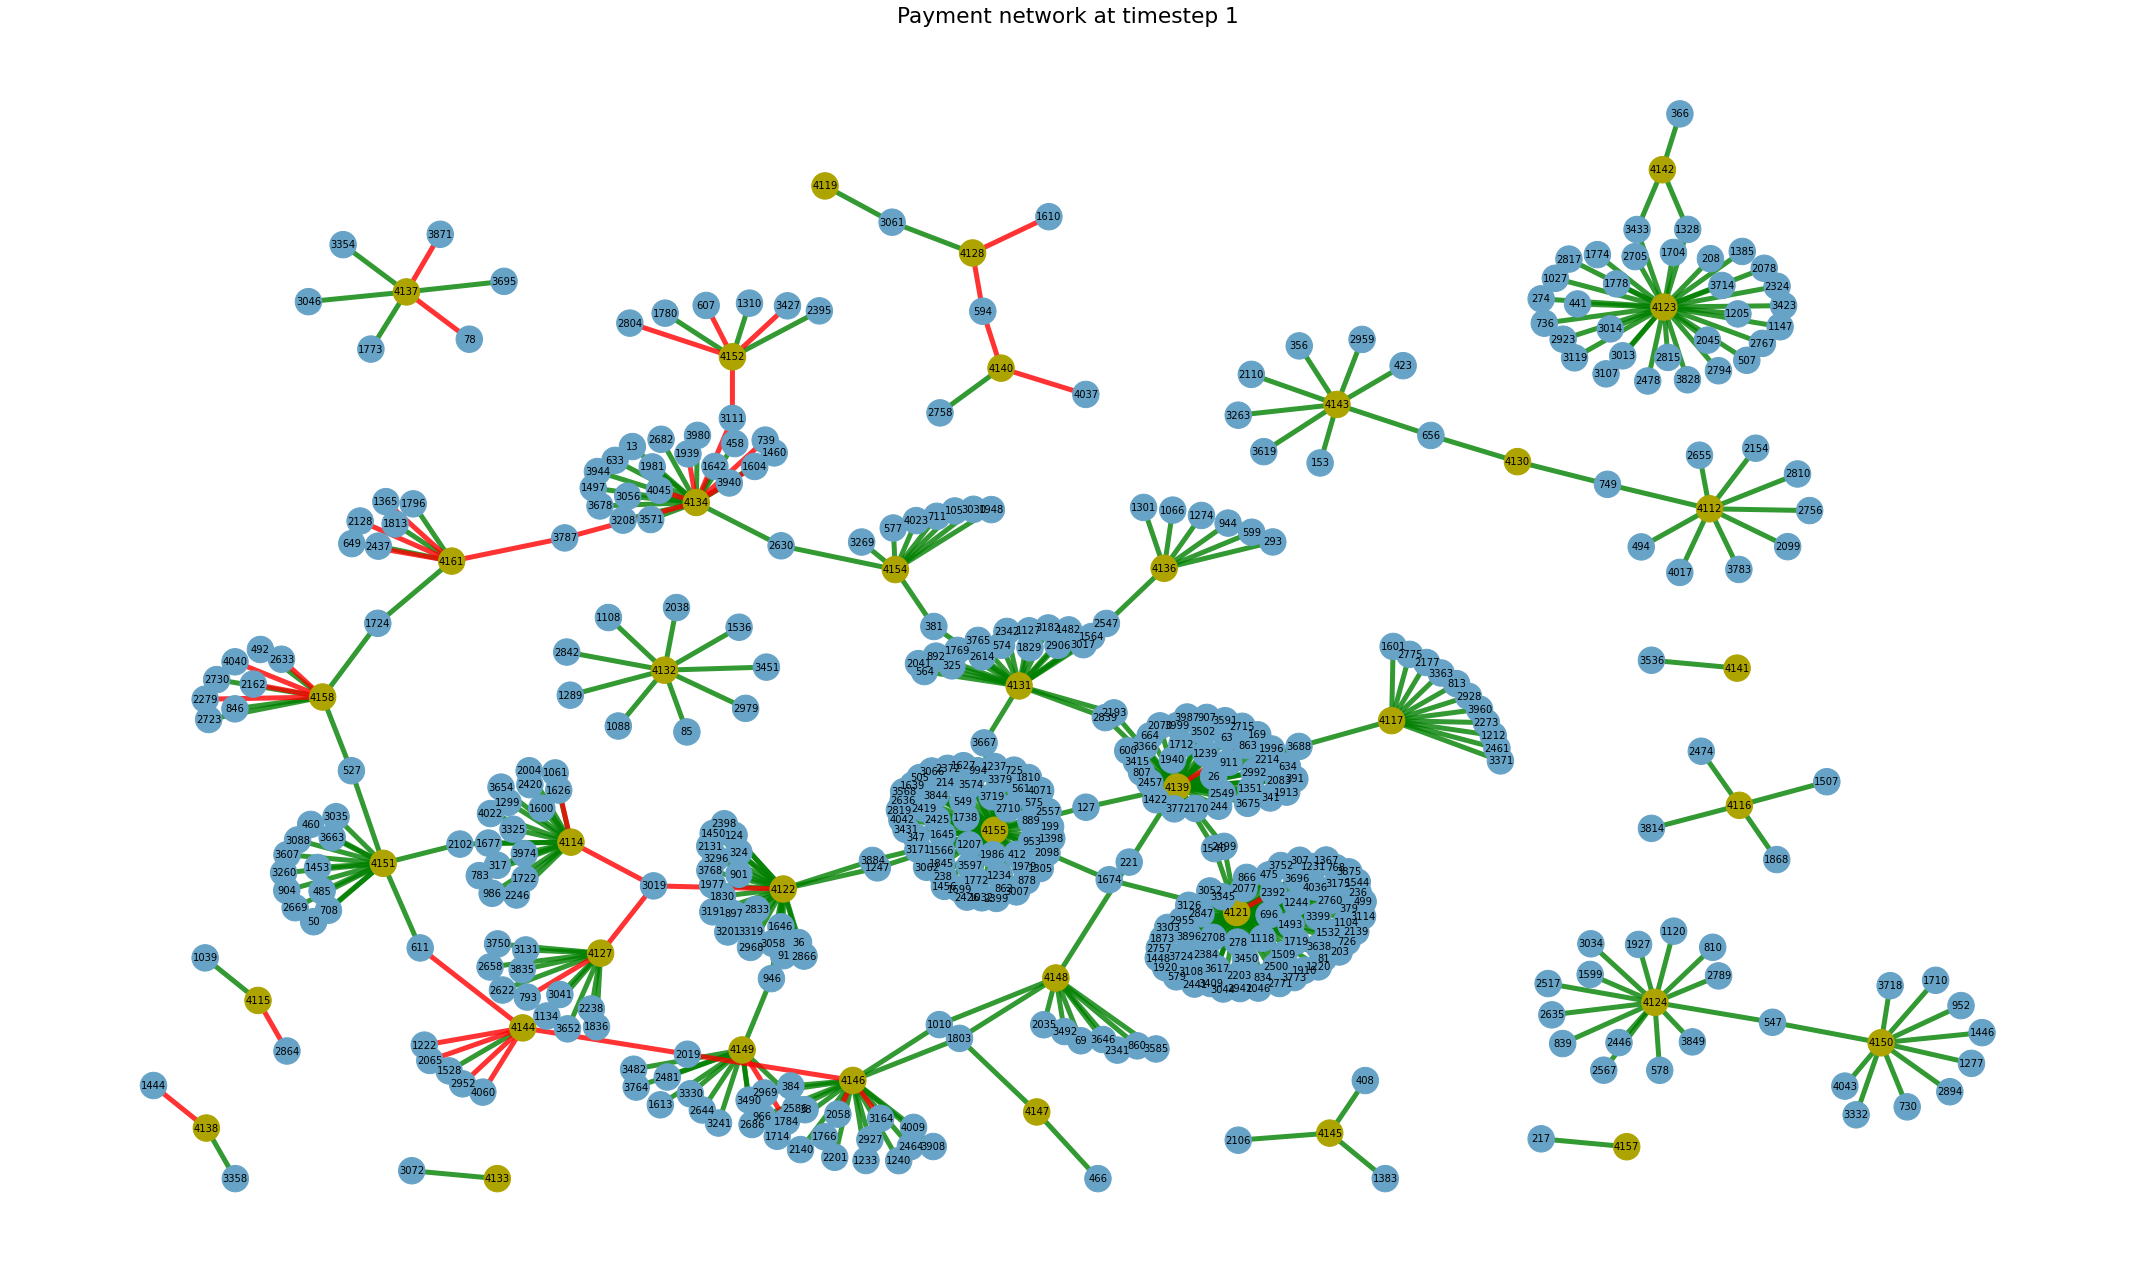

In [34]:
dynamic_payment_network.draw_nx_graph_w_edge_label_at_specific_time(1)

#### check some edge label

In [30]:
edge_list['data'][np.where((edge_list['data'][:,0]==1444)&(edge_list['data'][:,1]==4138))[0], :],edge_list['data'][np.where((edge_list['data'][:,0]==3358)&(edge_list['data'][:,1]==4138))[0], :]

(array([[1444, 4138,    1]], dtype=int32),
 array([[3358, 4138,    0]], dtype=int32))

#### check node features

In [31]:
dynamic_payment_network.src_node_static_attribute[1444],dynamic_payment_network.dst_node_static_attribute[4138]

({'customer': "'C1667161948'",
  'age': "'3'",
  'gender': "'M'",
  'zipcodeOri': "'28007'"},
 {'merchant': "'M2080407379'",
  'zipMerchant': "'28007'",
  'category': "'es_travel'"})

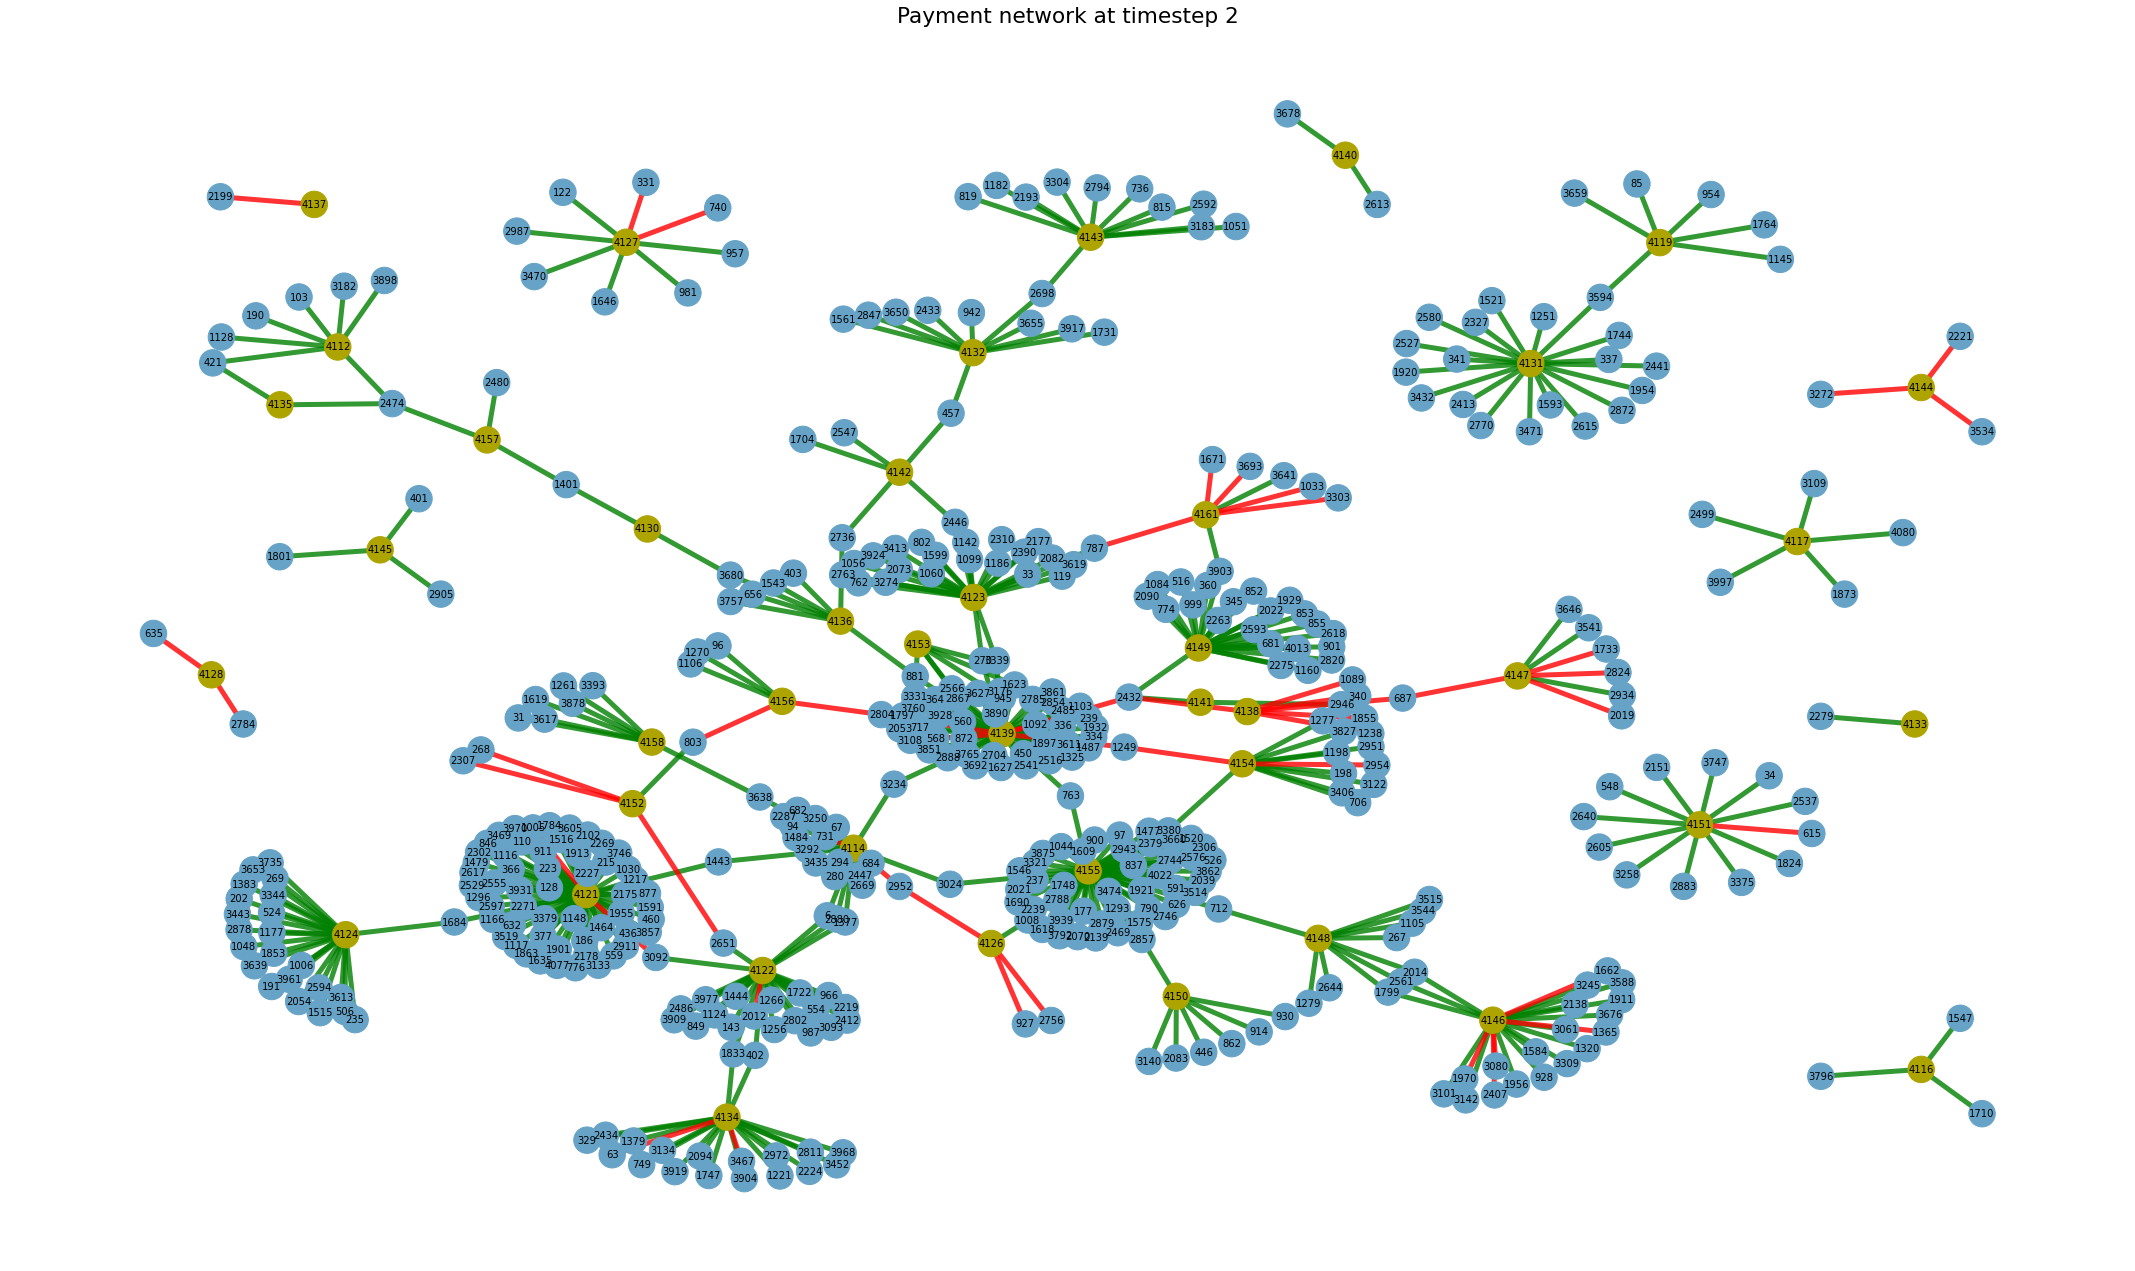

In [35]:
dynamic_payment_network.draw_nx_graph_w_edge_label_at_specific_time(2)